First 5 rows of dataset:
         Timestamp  Gender        Country Occupation self_employed  \
0  8/27/2014 11:29  Female  United States  Corporate           NaN   
1  8/27/2014 11:31  Female  United States  Corporate           NaN   
2  8/27/2014 11:32  Female  United States  Corporate           NaN   
3  8/27/2014 11:37  Female  United States  Corporate            No   
4  8/27/2014 11:43  Female  United States  Corporate            No   

  family_history treatment Days_Indoors Growing_Stress Changes_Habits  \
0             No       Yes    1-14 days            Yes             No   
1            Yes       Yes    1-14 days            Yes             No   
2            Yes       Yes    1-14 days            Yes             No   
3            Yes       Yes    1-14 days            Yes             No   
4            Yes       Yes    1-14 days            Yes             No   

  Mental_Health_History Mood_Swings Coping_Struggles Work_Interest  \
0                   Yes      Medium          

C:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


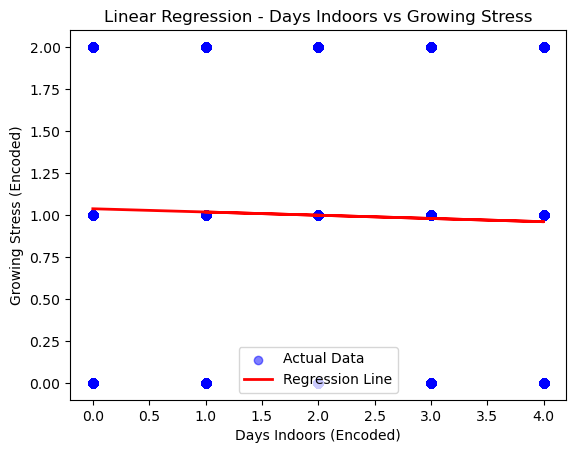

In [3]:
                        
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
file_path = "C:/Users/Jaidev sharma/Desktop/ml labs/Mental Health Dataset.csv"  # Make sure the CSV is in the same folder as your code
df = pd.read_csv(file_path)

# Step 3: Display first few rows
print("First 5 rows of dataset:")
print(df.head())

# Step 4: Encode Categorical Columns for Regression
# We will use 'Days_Indoors' as X_train and 'Growing_Stress' as y_train
encoder_days = LabelEncoder()
encoder_stress = LabelEncoder()

df['Days_Indoors'] = encoder_days.fit_transform(df['Days_Indoors'])
df['Growing_Stress'] = encoder_stress.fit_transform(df['Growing_Stress'])

# Step 5: Prepare Data
X_train = df[['Days_Indoors']].values   # Independent variable
y_train = df['Growing_Stress'].values   # Target variable

# Step 6: Train the Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)

# Step 7: Predictions
y_train_pred = reg.predict(X_train)

# Step 8: Print Results
print("\nCoefficient (Slope):", reg.coef_[0])
print("Intercept:", reg.intercept_)
print("First 10 Predictions:", y_train_pred[:10])

# Optional: Step 9 - Plotting the Regression Line
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_train, y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Days Indoors (Encoded)")
plt.ylabel("Growing Stress (Encoded)")
plt.title("Linear Regression - Days Indoors vs Growing Stress")
plt.legend()
plt.show()


In [4]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Step 2: Load Dataset
file_path = "C:/Users/Jaidev sharma/Desktop/ml labs/Mental Health Dataset.csv"
df = pd.read_csv(file_path)

# Step 3: Encode Categorical Variables
encoder_days = LabelEncoder()
encoder_stress = LabelEncoder()
df['Days_Indoors'] = encoder_days.fit_transform(df['Days_Indoors'])
df['Growing_Stress'] = encoder_stress.fit_transform(df['Growing_Stress'])

# Step 4: Prepare Features and Target
X = df[['Days_Indoors']].values
y = df['Growing_Stress'].values

# Step 5: Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train the Model
reg = LinearRegression().fit(X_train, y_train)

# Step 7: Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Step 8: Metrics Function
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Step 9: Calculate Metrics for Train and Test
train_mse, train_rmse, train_mape, train_r2 = regression_metrics(y_train, y_train_pred)
test_mse, test_rmse, test_mape, test_r2 = regression_metrics(y_test, y_test_pred)

# Step 10: Display Results
print("Train Set Metrics:")
print(f"  MSE  : {train_mse}")
print(f"  RMSE : {train_rmse}")
print(f"  MAPE : {train_mape}")
print(f"  R²   : {train_r2}")

print("\nTest Set Metrics:")
print(f"  MSE  : {test_mse}")
print(f"  RMSE : {test_rmse}")
print(f"  MAPE : {test_mape}")
print(f"  R²   : {test_r2}")


Train Set Metrics:
  MSE  : 0.6823033954338166
  RMSE : 0.82601658302592
  MAPE : 1536619701463169.2
  R²   : 0.0010069317399260536

Test Set Metrics:
  MSE  : 0.6812500264653154
  RMSE : 0.8253787169931845
  MAPE : 1530742988204801.5
  R²   : 0.0014354173625876765


In [5]:
print(df.columns)


Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


A2 - Single Feature Metrics
Train: (0.24997556249344866, 0.4999755618962277, 1125789850097225.6, 1.2069221177801737e-05)
Test : (0.24996073026452595, 0.4999607287222927, 1122994127185401.0, 2.064523195222101e-05)

A3 - All Features Metrics
Train: (0.20090901316345564, 0.44822875093355585, 904813756818315.6, 0.19629508443088506)
Test : (0.20134600050157944, 0.44871594634198086, 903057686975319.5, 0.1945060992035733)

=== A2 vs A3 Comparison Table ===
         Metric  A2 - Single Feature  A3 - All Features
0   MSE (Train)         2.499756e-01       2.009090e-01
1  RMSE (Train)         4.999756e-01       4.482288e-01
2  MAPE (Train)         1.125790e+15       9.048138e+14
3    R² (Train)         1.206922e-05       1.962951e-01
4    MSE (Test)         2.499607e-01       2.013460e-01
5   RMSE (Test)         4.999607e-01       4.487159e-01
6   MAPE (Test)         1.122994e+15       9.030577e+14
7     R² (Test)         2.064523e-05       1.945061e-01


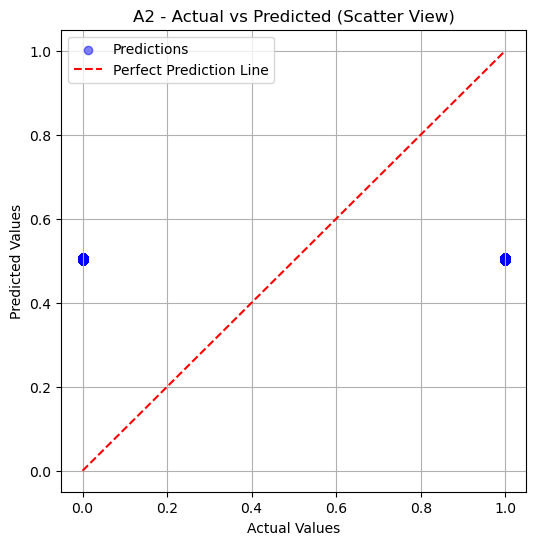

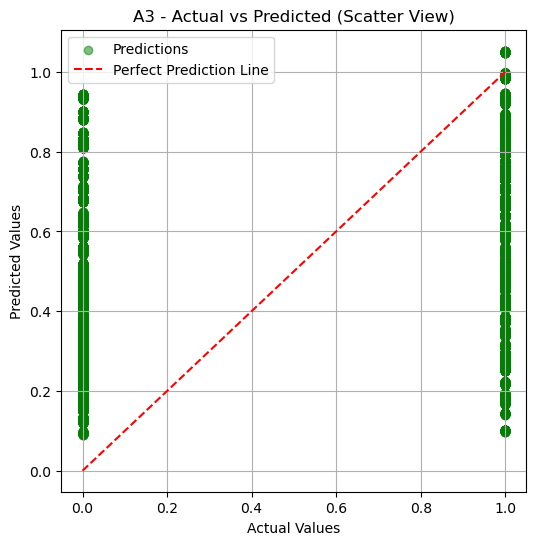

In [6]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# -------- Helper Function: Train and Evaluate --------
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return reg, X_test, y_test, y_test_pred, (mse_train, rmse_train, mape_train, r2_train), (mse_test, rmse_test, mape_test, r2_test)

# -------- Data Preprocessing --------
file_path = "C:/Users/Jaidev sharma/Desktop/ml labs/Mental Health Dataset.csv"
df = pd.read_csv(file_path)
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

y = df["treatment"]

# -------- A2: Single Feature --------
X_single = df[["Days_Indoors"]]
model_a2, X_test_a2, y_test_a2, y_pred_a2, train_metrics_a2, test_metrics_a2 = train_and_evaluate(X_single, y)

# -------- A3: All Features --------
X_all = df.drop(columns=["treatment"])
model_a3, X_test_a3, y_test_a3, y_pred_a3, train_metrics_a3, test_metrics_a3 = train_and_evaluate(X_all, y)

# -------- Print Metrics --------
print("A2 - Single Feature Metrics")
print("Train:", train_metrics_a2)
print("Test :", test_metrics_a2)

print("\nA3 - All Features Metrics")
print("Train:", train_metrics_a3)
print("Test :", test_metrics_a3)

# -------- Comparison Table --------
comparison_df = pd.DataFrame({
    "Metric": ["MSE (Train)", "RMSE (Train)", "MAPE (Train)", "R² (Train)", "MSE (Test)", "RMSE (Test)", "MAPE (Test)", "R² (Test)"],
    "A2 - Single Feature": [*train_metrics_a2, *test_metrics_a2],
    "A3 - All Features": [*train_metrics_a3, *test_metrics_a3]
})

print("\n=== A2 vs A3 Comparison Table ===")
print(comparison_df)

# -------- Plot A2: Scatter View --------
plt.figure(figsize=(6, 6))
plt.scatter(y_test_a2, y_pred_a2, alpha=0.5, color='blue', label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("A2 - Actual vs Predicted (Scatter View)")
plt.legend()
plt.grid(True)
plt.show()

# -------- Plot A3: Scatter View --------
plt.figure(figsize=(6, 6))
plt.scatter(y_test_a3, y_pred_a3, alpha=0.5, color='green', label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("A3 - Actual vs Predicted (Scatter View)")
plt.legend()
plt.grid(True)
plt.show()


C:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


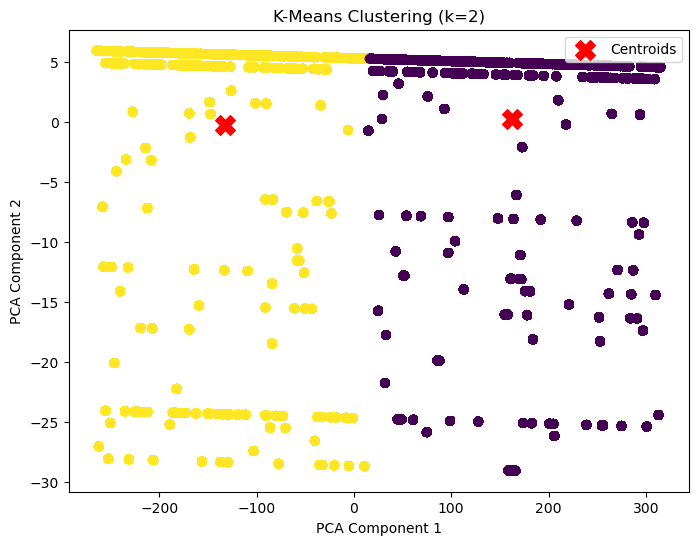

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("C:/Users/Jaidev sharma/Desktop/ml labs/Mental Health Dataset.csv")  # Replace with your actual file name

# 2. Encode categorical data
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# 3. Remove target column for clustering
X = df_encoded.drop('treatment', axis=1)  # Replace 'treatment' with your target column name

# 4. Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

# 5. Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 6. Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (k=2)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Take a random subset of row indices
sample_idx = np.random.choice(len(X), size=500, replace=False)
X_sample = X.iloc[sample_idx]  # ✅ Use iloc for row-based selection

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_sample)

# Compute metrics
sil_score = silhouette_score(X_sample, kmeans.labels_)
ch_score = calinski_harabasz_score(X_sample, kmeans.labels_)
db_score = davies_bouldin_score(X_sample, kmeans.labels_)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Calinski-Harabasz Score: {ch_score:.4f}")
print(f"Davies-Bouldin Index: {db_score:.4f}")


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.6309
Calinski-Harabasz Score: 1542.5253
Davies-Bouldin Index: 0.4972


In [10]:

df = df.drop(columns=["Timestamp"])


In [11]:
df = df.fillna(df.mode().iloc[0])


In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)  # df_encoded is your one-hot encoded DataFrame


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler


import pandas as pd
df = pd.read_csv("C:/Users/Jaidev sharma/Desktop/ml labs/Mental Health Dataset.csv")  # or your Excel file

subset_fraction = 0.2  # use 20% of the dataset
df_subset = df_encoded.sample(frac=subset_fraction, random_state=42)

# ----------------------------
# Step 1: Scale the subset
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_subset)

# ----------------------------
# Step 2: Define k range
# ----------------------------
k_values = range(2, 7)  # 2 to 6 clusters
sil_scores = []
ch_scores = []
db_scores = []

# ----------------------------
# Step 3: Loop through k values using MiniBatchKMeans
# ----------------------------
for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sil_scores.append(silhouette_score(X_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))
    db_scores.append(davies_bouldin_score(X_scaled, labels))

# ----------------------------
# Step 4: Plot results
# ----------------------------
plt.figure(figsize=(18,5))

plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score vs k (subset)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Score vs k (subset)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o', color='green')
plt.title('Davies-Bouldin Score vs k (subset)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Score')

plt.tight_layout()
plt.show()


C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\anaconda3\Lib\site-packages\sklearn\clus

In [17]:
# Create a DataFrame to display the scores
scores_df = pd.DataFrame({
    'k': list(k_values),
    'Silhouette Score': sil_scores,
    'Calinski-Harabasz Score': ch_scores,
    'Davies-Bouldin Score': db_scores
})

# Display the DataFrame
print("Clustering Scores for Different k Values:")
display(scores_df)




Clustering Scores for Different k Values:


,k,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,2,0.027430,93.202490,1.130627
1,3,-0.089494,92.648515,1.368080
2,4,-0.103224,93.032109,1.541365
3,5,-0.141696,107.475849,1.484611
4,6,-0.105717,99.100255,1.398294


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Define range for k
# ----------------------------
k_range = range(2, 20)
distortions = []

# ----------------------------
# Step 2: Fit KMeans and collect inertia
# ----------------------------
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# ----------------------------
# Step 3: Plot the elbow
# ----------------------------
plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()
